In [1]:
import pandas as pd

In [2]:
Df= pd.read_csv("hotel_bookings.csv")
Df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-15
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-15
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-15
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-15
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-15


In [3]:
Df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [4]:
Df.count()

hotel                             119390
is_canceled                       119390
lead_time                         119390
arrival_date_year                 119390
arrival_date_month                119390
arrival_date_week_number          119390
arrival_date_day_of_month         119390
stays_in_weekend_nights           119390
stays_in_week_nights              119390
adults                            119390
children                          119386
babies                            119390
meal                              119390
country                           118902
market_segment                    119390
distribution_channel              119390
is_repeated_guest                 119390
previous_cancellations            119390
previous_bookings_not_canceled    119390
reserved_room_type                119390
assigned_room_type                119390
booking_changes                   119390
deposit_type                      119390
agent                             103050
company         

In [5]:
Df["company"].fillna("Unknown", inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_21180\3435259254.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  Df["company"].fillna("Unknown", inplace=True)


In [6]:
Df["agent"].fillna(0,inplace=True)

In [7]:
Df.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
agent                               0
company                             0
days_in_waiting_list                0
customer_typ

In [8]:
Df.dropna(inplace=True)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

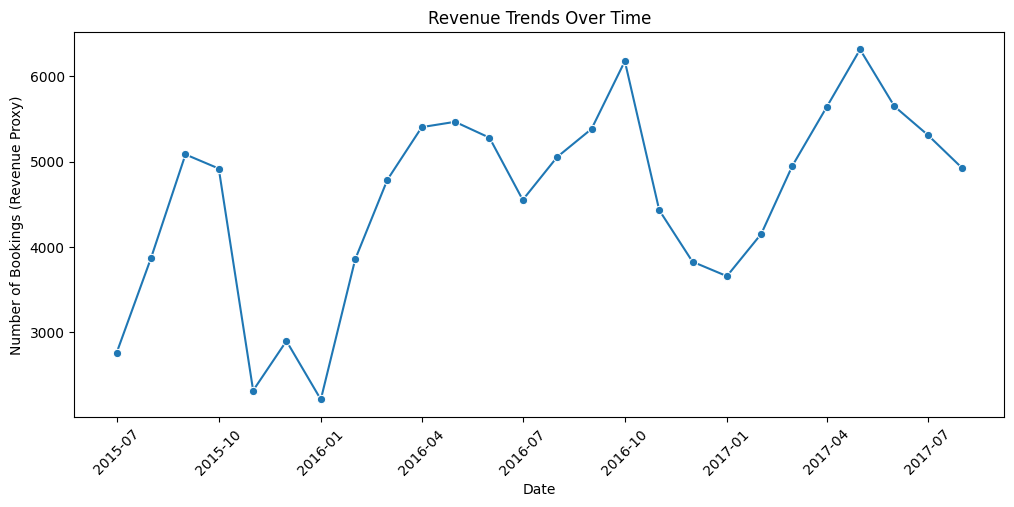

In [10]:
# Group by year and month
Df["arrival_date"] = pd.to_datetime(Df["arrival_date_year"].astype(str) + "-" + Df["arrival_date_month"] + "-01")
revenue_trends = Df.groupby("arrival_date").size()

# Plot revenue trends
plt.figure(figsize=(12, 5))
sns.lineplot(x=revenue_trends.index, y=revenue_trends.values, marker="o")
plt.title("Revenue Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Bookings (Revenue Proxy)")
plt.xticks(rotation=45)
plt.show()


Cancellation Rate: 37.14%


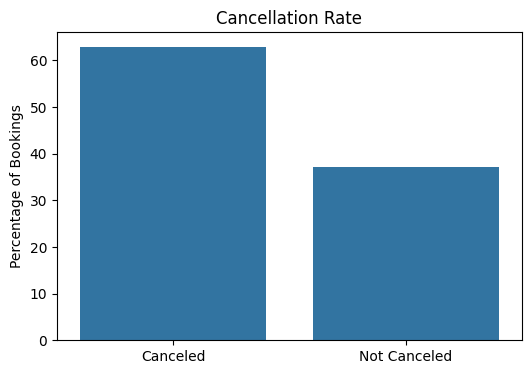

In [11]:
cancellation_rate = Df["is_canceled"].mean() * 100
print(f"Cancellation Rate: {cancellation_rate:.2f}%")

# Plot the cancellation rate
plt.figure(figsize=(6, 4))
sns.barplot(x=["Canceled", "Not Canceled"], y=Df["is_canceled"].value_counts(normalize=True) * 100)
plt.title("Cancellation Rate")
plt.ylabel("Percentage of Bookings")
plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_21180\820789063.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.index, y=country_counts.values, palette="coolwarm")


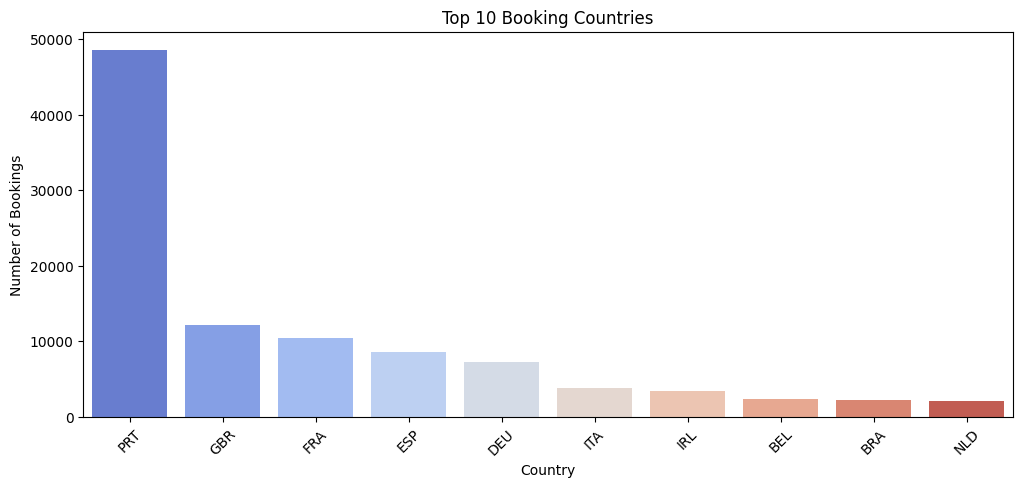

In [12]:
# Count the number of bookings per country
country_counts = Df["country"].value_counts().head(10)  # Top 10 countries

# Plot geographical distribution
plt.figure(figsize=(12, 5))
sns.barplot(x=country_counts.index, y=country_counts.values, palette="coolwarm")
plt.title("Top 10 Booking Countries")
plt.xlabel("Country")
plt.ylabel("Number of Bookings")
plt.xticks(rotation=45)
plt.show()


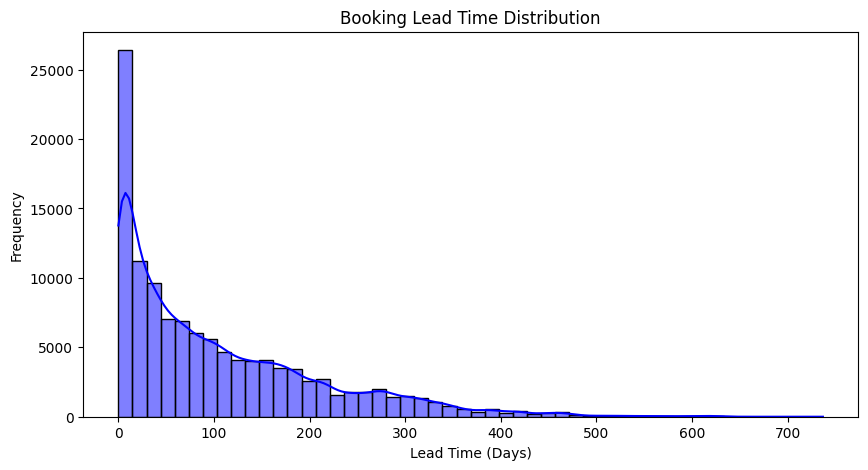

In [13]:
plt.figure(figsize=(10, 5))
sns.histplot(Df["lead_time"], bins=50, kde=True, color="blue")
plt.title("Booking Lead Time Distribution")
plt.xlabel("Lead Time (Days)")
plt.ylabel("Frequency")
plt.show()


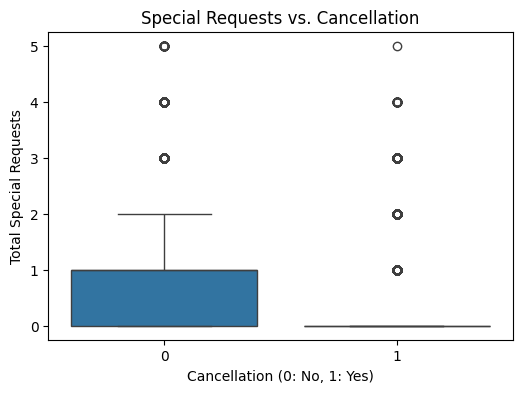

In [14]:
plt.figure(figsize=(6, 4))
sns.boxplot(x="is_canceled", y="total_of_special_requests", data=Df)
plt.title("Special Requests vs. Cancellation")
plt.xlabel("Cancellation (0: No, 1: Yes)")
plt.ylabel("Total Special Requests")
plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_21180\3008836438.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="required_car_parking_spaces", data=Df, palette="viridis")


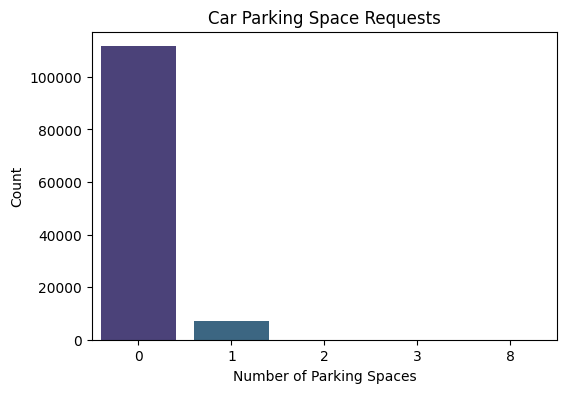

In [15]:
plt.figure(figsize=(6, 4))
sns.countplot(x="required_car_parking_spaces", data=Df, palette="viridis")
plt.title("Car Parking Space Requests")
plt.xlabel("Number of Parking Spaces")
plt.ylabel("Count")
plt.show()


In [16]:
pip install faiss-cpu chromadb langchain google-generativeai sentence-transformers

Defaulting to user installation because normal site-packages is not writeable
  Using cached chromadb-0.6.3-py3-none-any.whl.metadata (6.8 kB)
  Using cached build-1.2.2.post1-py3-none-any.whl.metadata (6.5 kB)
  Using cached chroma_hnswlib-0.7.6.tar.gz (32 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached fastapi-0.115.11-py3-none-any.whl.metadata (27 kB)
  Using cached uvicorn-0.34.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached posthog-3.21.0-py2.py3-none-any.whl.metadata (2.9 kB)
  Using cached onnxruntime-1.21.0-cp312-cp312-win_amd64.whl.metadata (4.9 kB)
  Using cached opentelemetry_api-1.31.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached opentelemetry_exporter_otlp_proto_grpc-1

  error: subprocess-exited-with-error
  
  × Building wheel for chroma-hnswlib (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [5 lines of output]
      running bdist_wheel
      running build
      running build_ext
      building 'hnswlib' extension
      error: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for chroma-hnswlib
ERROR: Failed to build installable wheels for some pyproject.toml based projects (chroma-hnswlib)


In [17]:
import pandas as pd
import faiss
import numpy as np
import google.generativeai as genai
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.vectorstores import FAISS
from langchain.chains import RetrievalQA
from langchain.document_loaders import DataFrameLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter


In [ ]:
GENAI_API_KEY = "You Gemini-API"
genai.configure(api_key=GENAI_API_KEY)
model_gemini = genai.GenerativeModel("gemini-2.0-flash")


In [19]:
# Convert all columns to text format for embedding storage
Df["text"] = Df.apply(lambda row: ", ".join(f"{col}: {row[col]}" for col in Df.columns), axis=1)

In [21]:
pip install sentence-transformers

Defaulting to user installation because normal site-packages is not writeable
  Using cached transformers-4.49.0-py3-none-any.whl.metadata (44 kB)
Using cached transformers-4.49.0-py3-none-any.whl (10.0 MB)
Note: you may need to restart the kernel to use updated packages.


In [22]:
# Use a pre-trained sentence transformer for embedding
embed_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")

# Convert text data into embeddings
text_data = Df["text"].tolist()
text_embeddings = np.array(embed_model.embed_documents(text_data)).astype("float32")

# Store embeddings in FAISS
dimension = text_embeddings.shape[1]
index = faiss.IndexFlatL2(dimension)
index.add(text_embeddings)


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Dell\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [33]:
sample_2017 = Df[Df["arrival_date_year"] == 2017]["text"].iloc[0]
print(sample_2017)  # Check if it's a valid 2017 record

hotel: Resort Hotel, is_canceled: 1, lead_time: 74, arrival_date_year: 2017, arrival_date_month: January, arrival_date_week_number: 1, arrival_date_day_of_month: 1, stays_in_weekend_nights: 1, stays_in_week_nights: 0, adults: 2, children: 0.0, babies: 0, meal: BB, country: PRT, market_segment: Online TA, distribution_channel: TA/TO, is_repeated_guest: 0, previous_cancellations: 0, previous_bookings_not_canceled: 0, reserved_room_type: A, assigned_room_type: A, booking_changes: 0, deposit_type: No Deposit, agent: 5.0, company: Unknown, days_in_waiting_list: 0, customer_type: Transient, adr: 57.6, required_car_parking_spaces: 0, total_of_special_requests: 0, reservation_status: Canceled, reservation_status_date: 20-10-16, arrival_date: 2017-01-01 00:00:00


In [27]:
faiss.write_index(index, "faiss_index.bin")

In [37]:
def retrieve_answer(query, k=10):
    # Convert query to embedding
    query_embedding = np.array(embed_model.embed_documents([query])).astype("float32")

    # Retrieve top k matches
    _, indices = index.search(query_embedding, k)

    # Get the relevant documents
    retrieved_texts = [text_data[i] for i in indices[0] if i < len(text_data)]  # Ensure valid indices

    # Combine multiple retrieved results
    context = "\n".join(retrieved_texts)

    # Query Google Gemini for final answer
    response = model_gemini.generate_content(f"Using this data:\n{context}\nAnswer the following question: {query}")

    return response.text


In [38]:
query_embedding = embed_model.embed_documents(["total revenue July 2017"])[0]
D, I = index.search(np.array([query_embedding]), k=5)

for idx in I[0]:
    print(text_data[idx])  # Ensure FAISS retrieves relevant records

hotel: City Hotel, is_canceled: 1, lead_time: 157, arrival_date_year: 2016, arrival_date_month: August, arrival_date_week_number: 32, arrival_date_day_of_month: 1, stays_in_weekend_nights: 1, stays_in_week_nights: 2, adults: 1, children: 0.0, babies: 0, meal: BB, country: PRT, market_segment: Corporate, distribution_channel: Corporate, is_repeated_guest: 0, previous_cancellations: 0, previous_bookings_not_canceled: 0, reserved_room_type: E, assigned_room_type: E, booking_changes: 1, deposit_type: Non Refund, agent: 0.0, company: 51.0, days_in_waiting_list: 0, customer_type: Transient-Party, adr: 106.0, required_car_parking_spaces: 0, total_of_special_requests: 0, reservation_status: Canceled, reservation_status_date: 29-07-16, arrival_date: 2016-08-01 00:00:00
hotel: City Hotel, is_canceled: 0, lead_time: 143, arrival_date_year: 2016, arrival_date_month: July, arrival_date_week_number: 30, arrival_date_day_of_month: 18, stays_in_weekend_nights: 1, stays_in_week_nights: 3, adults: 1, ch

In [40]:
query_1 = "Show me total revenue for July 2016."
response_1 = retrieve_answer(query_1)
print(response_1)


To calculate the total revenue for July 2016, we need to sum the ADR (Average Daily Rate) for all bookings in July 2016 that were not canceled.

Based on the provided data, the following bookings are relevant:

*   **Booking 1:** arrival\_date\_month: July, is\_canceled: 0, adr: 106.0
*   **Booking 2:** arrival\_date\_month: July, is\_canceled: 0, adr: 106.0

Total Revenue = 106.0 + 106.0 = 212.0

**Therefore, the total revenue for July 2016 is 212.0.**


In [39]:
query_2 = "Which locations had the highest booking cancellations?"
response_2 = retrieve_answer(query_2)
print(response_2)

Based on the provided data, all the bookings are for the same location: Resort Hotel in Portugal (PRT). They all also have `is_canceled: 1`.

Therefore, the location with the highest booking cancellations is **Resort Hotel in Portugal**.



In [41]:
query_3 = "What is the average price of a hotel booking?"
response_3 = retrieve_answer(query_3)
print(response_3)

To calculate the average price (ADR - Average Daily Rate) of a hotel booking from the provided data, I'll sum the ADR for each booking and then divide by the total number of bookings.

Here are the ADRs from the data:

*   0.0
*   131.0
*   180.5
*   190.1
*   93.0
*   93.0
*   122.4
*   93.0
*   93.0
*   72.25

Sum of ADRs: 0.0 + 131.0 + 180.5 + 190.1 + 93.0 + 93.0 + 122.4 + 93.0 + 93.0 + 72.25 = 1068.25

Total number of bookings: 10

Average ADR: 1068.25 / 10 = 106.825

Therefore, the average price of a hotel booking is approximately 106.83.

